### **1. Checking the Source: CHB-MIT Scalp EEG Database**
The dataset is derived from the **CHB-MIT EEG Scalp Database**, which is publicly available on **PhysioNet** ([Dataset Link](https://physionet.org/content/chbmit/1.0.0/)). 

According to the official documentation, this dataset was recorded using the **International 10-20 System** and includes **23 electrodes**.

---

### **2. Official List of EEG Channels in CHB-MIT**
The **23 channels (electrodes)** used in CHB-MIT EEG recordings are:

| **Index** | **Channel Name** | **Region** |
|-----------|----------------|------------|
| 1  | FP1-F7  | Frontal-Temporal |
| 2  | F7-T7  | Temporal |
| 3  | T7-P7  | Temporal-Parietal |
| 4  | P7-O1  | Parietal-Occipital |
| 5  | FP1-F3  | Frontal |
| 6  | F3-C3  | Frontal-Central |
| 7  | C3-P3  | Central-Parietal |
| 8  | P3-O1  | Parietal-Occipital |
| 9  | FP2-F8  | Frontal-Temporal |
| 10 | F8-T8  | Temporal |
| 11 | T8-P8  | Temporal-Parietal |
| 12 | P8-O2  | Parietal-Occipital |
| 13 | FP2-F4  | Frontal |
| 14 | F4-C4  | Frontal-Central |
| 15 | C4-P4  | Central-Parietal |
| 16 | P4-O2  | Parietal-Occipital |
| 17 | FZ-CZ  | Frontal-Central |
| 18 | CZ-PZ  | Central-Parietal |
| 19 | P7-T7  | Parietal-Temporal |
| 20 | T7-FT9  | Temporal |
| 21 | FT9-FT10  | Frontal-Temporal |
| 22 | FT10-T8  | Temporal |
| 23 | T8-P8  | Temporal-Parietal |

✅ These names are **officially provided** in the dataset description from PhysioNet.


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=np.load("dataset/eeg-seizure_val.npz")

In [40]:
data.files

['val_signals', 'val_labels']

In [41]:
signals,labels=data['val_signals'],data['val_labels']

In [42]:
signals.shape

(8071, 23, 256)

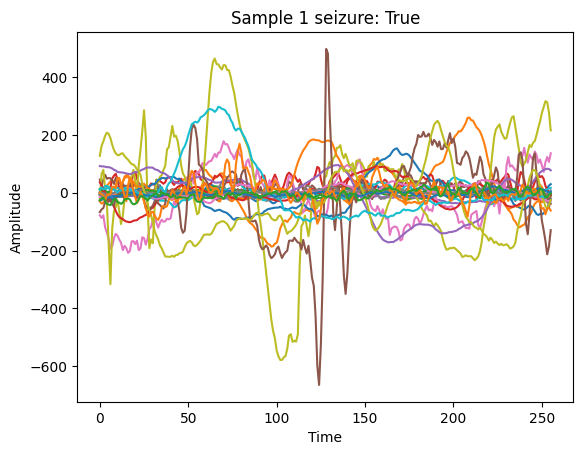

In [43]:
# Signals of all electrodes for sample 1
for i in range(np.shape(signals)[1]):
    plt.plot(signals[i][0])

plt.title(f'Sample 1 seizure: {bool(labels[0])}')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [44]:
seizures=signals[labels==1]
non_seizures=signals[labels==0]

In [45]:
non_seizures.shape

(6298, 23, 256)

In [46]:
seizures.shape

(1773, 23, 256)

In [47]:
# Function for plotting signals of all channles of sample
def plot_signals(signal, title):
    '''Plots the signals in the memory'''
    for i in range(np.shape(signal)[0]): # Loop through all electrodes
        plt.plot(np.arange(0,512,2),signals[i][0])

    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')


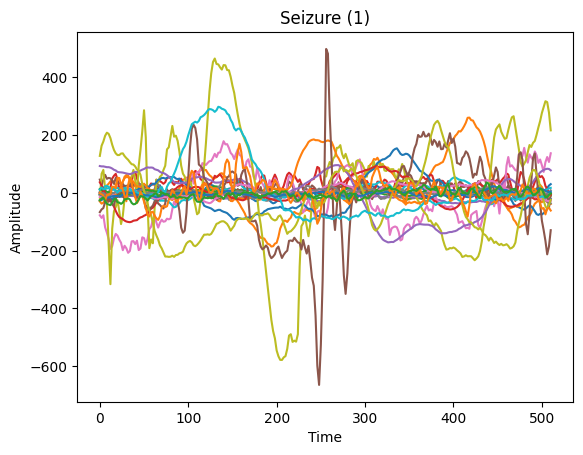

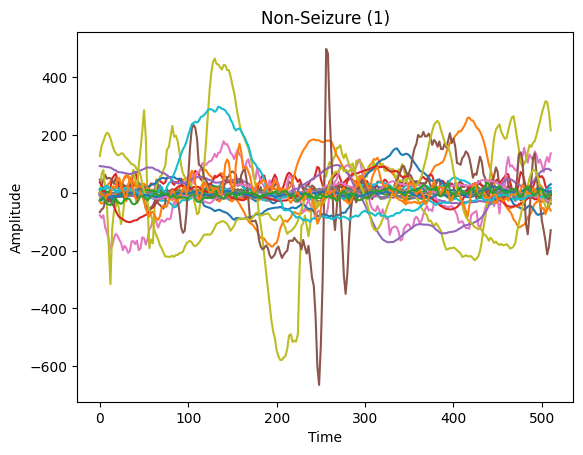

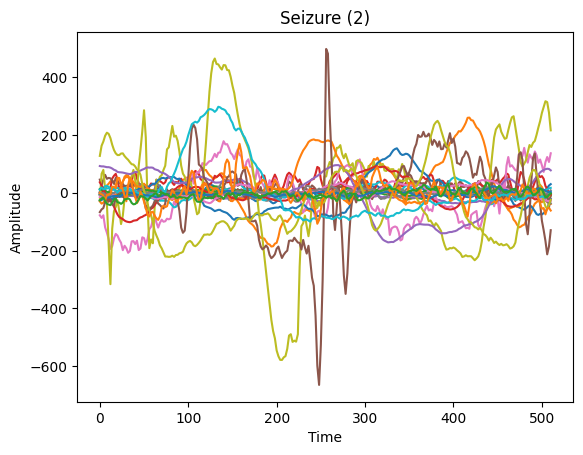

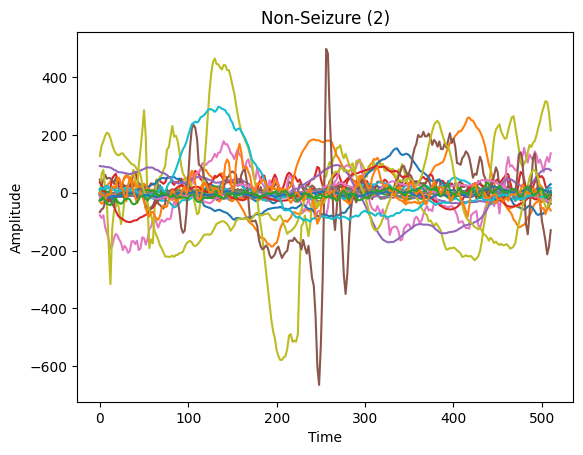

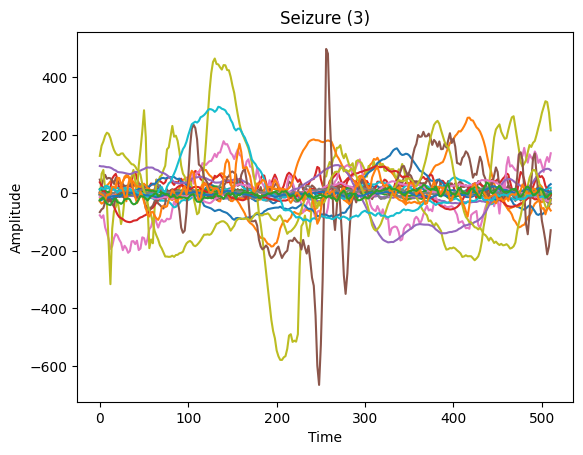

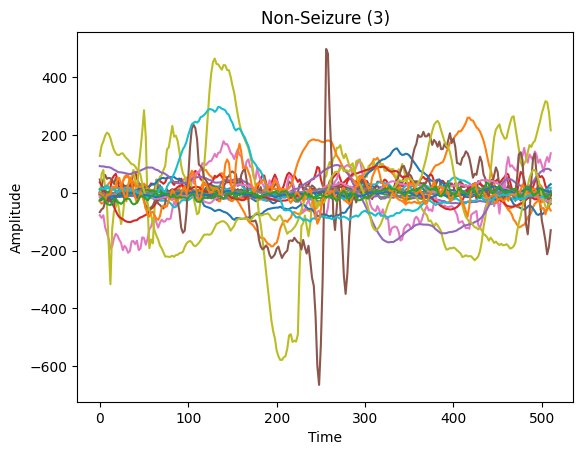

In [48]:
sample_size=int(input("Enter the number of samples you want to plot: "))
for i in range(sample_size):
    plot_signals(seizures[i], f'Seizure ({i+1})')
    plt.show()
    plot_signals(non_seizures[i], f'Non-Seizure ({i+1})')
    plt.show()

In [49]:
def plot_channel_diff(channel,channel_name):
    plt.plot(seizures[0][channel])
    plt.plot(non_seizures[0][channel])
    plt.title(f'Brainwave Sample 1: {channel_name}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend(['Seizure', 'Non-Seizure'])
    plt.show()

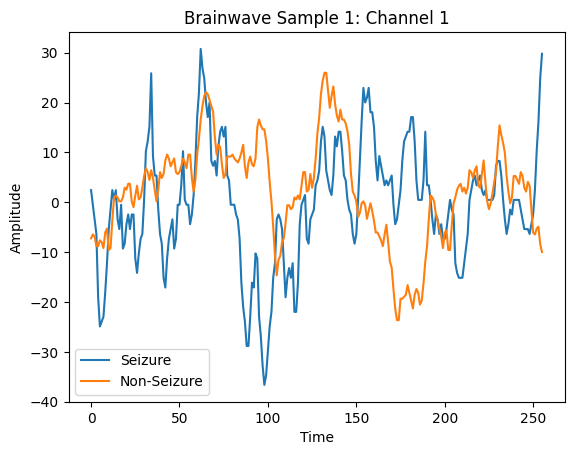

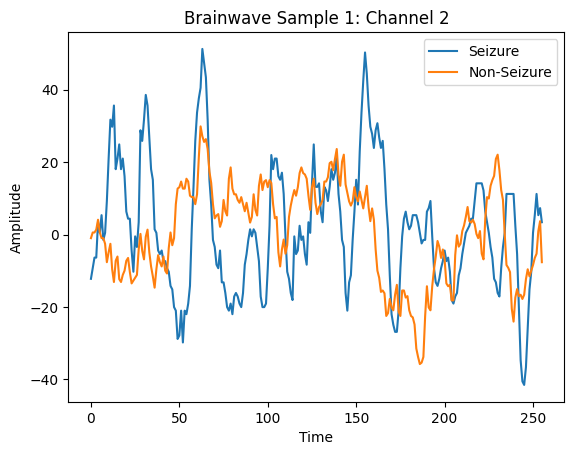

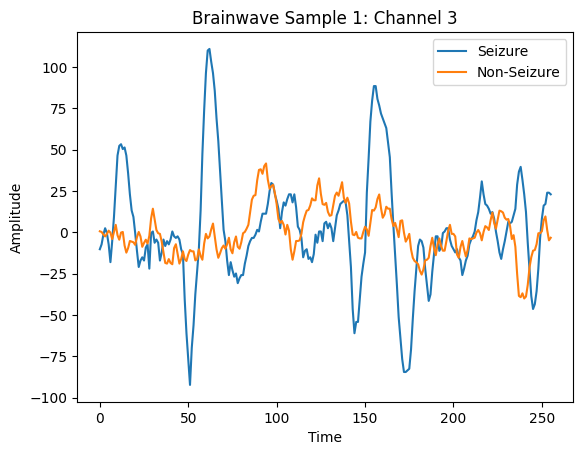

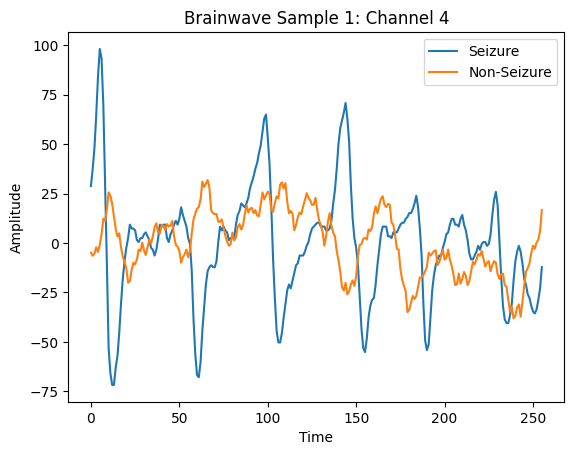

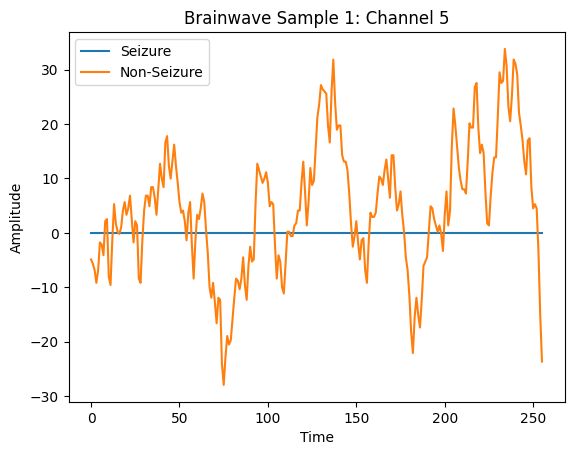

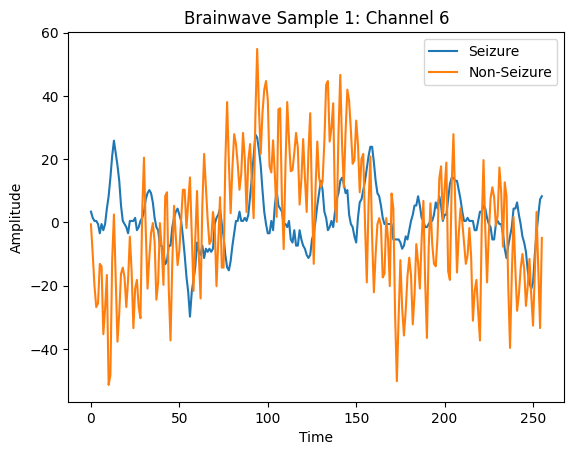

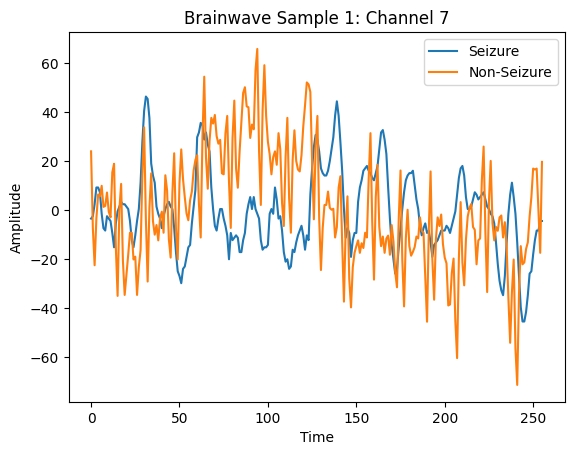

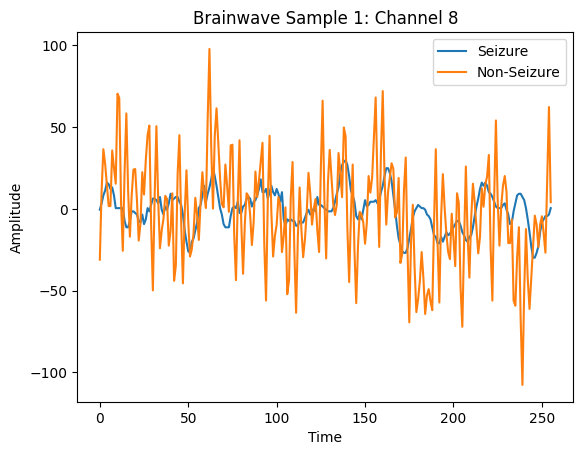

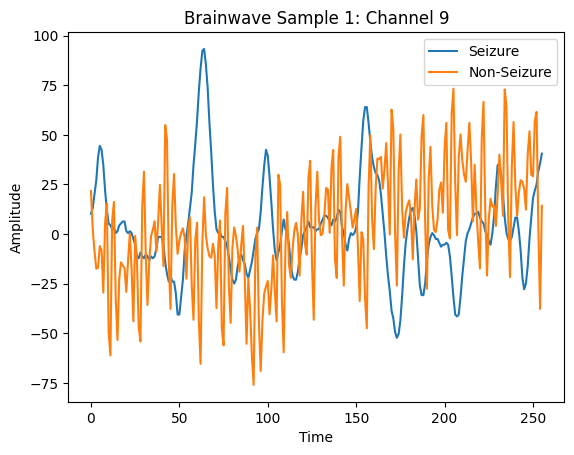

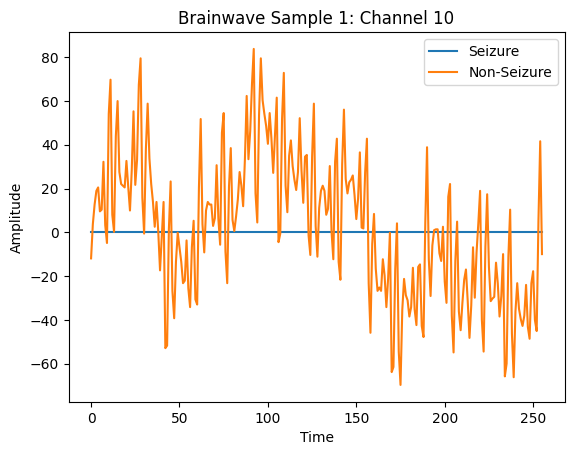

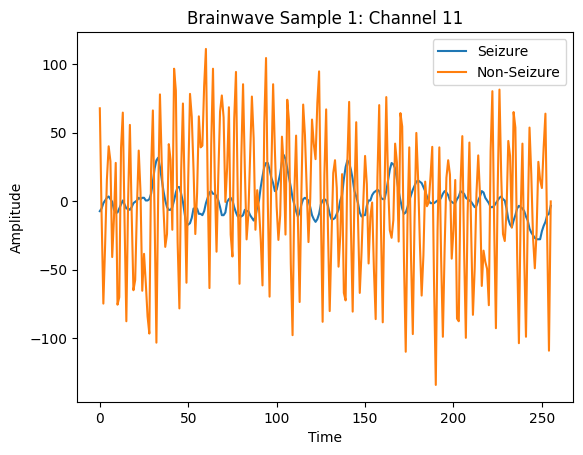

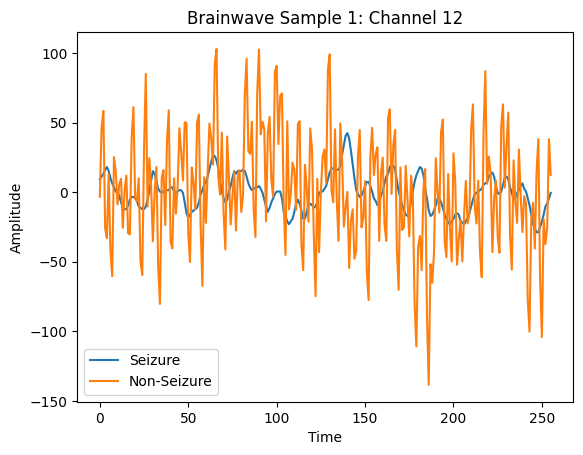

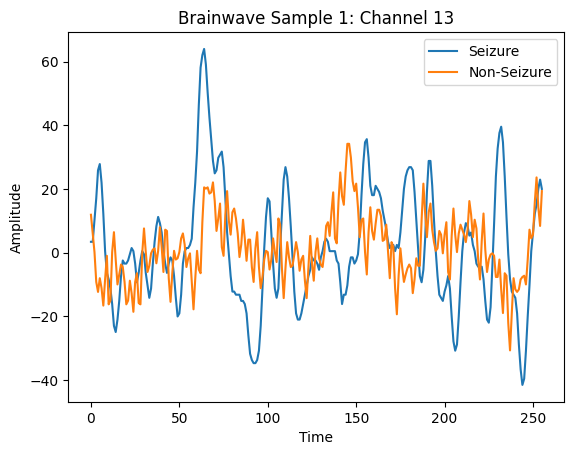

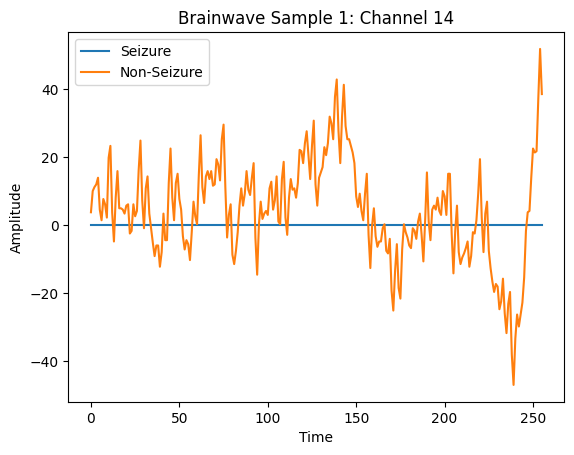

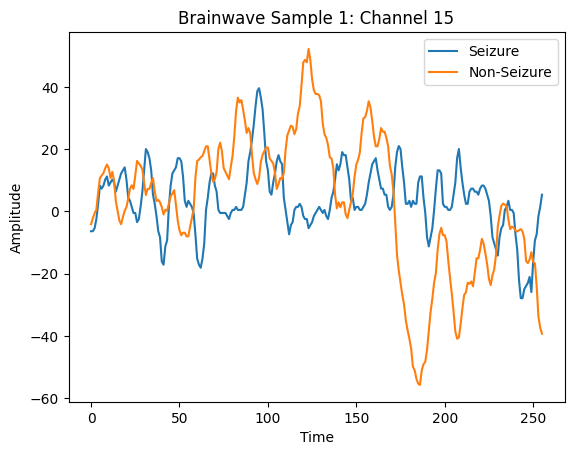

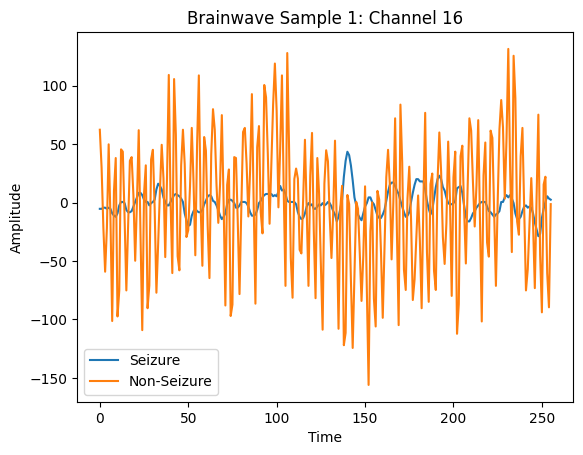

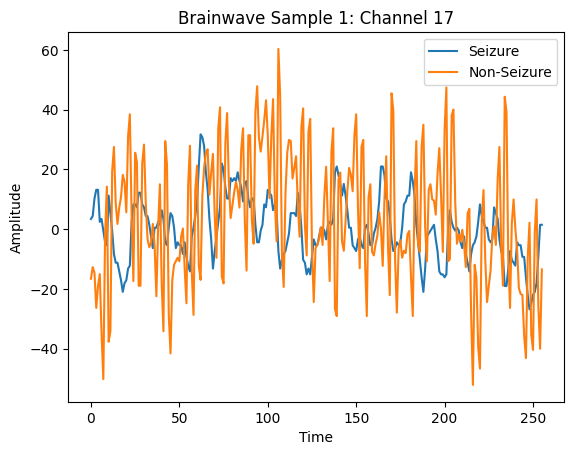

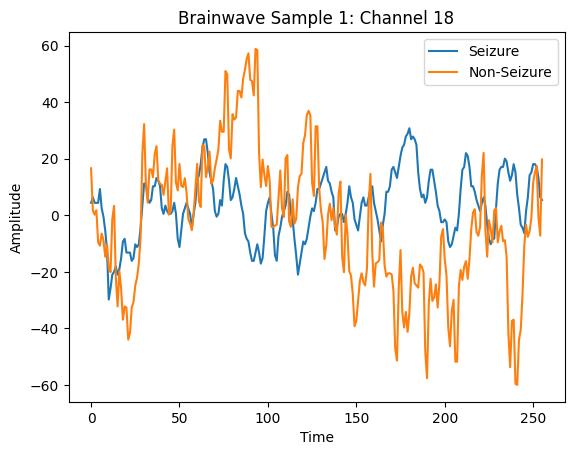

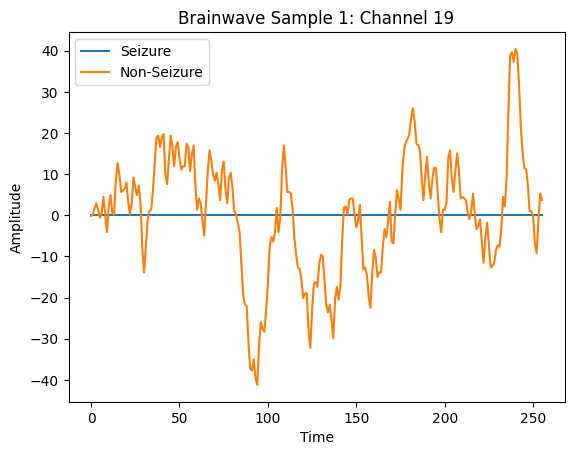

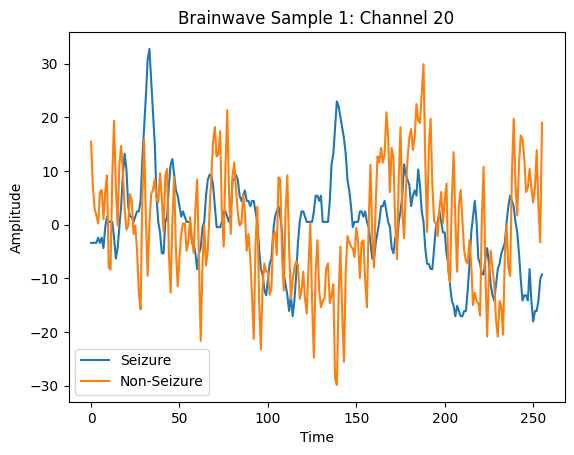

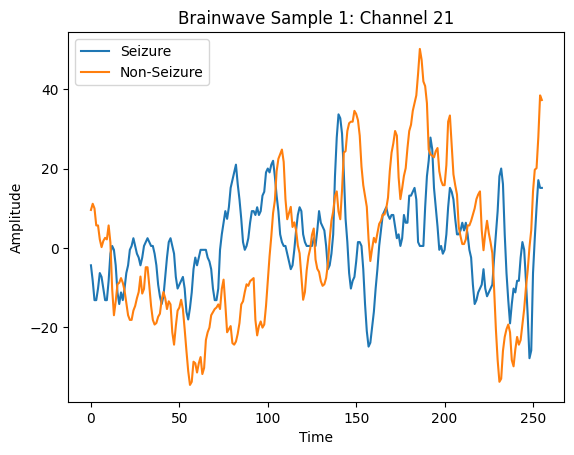

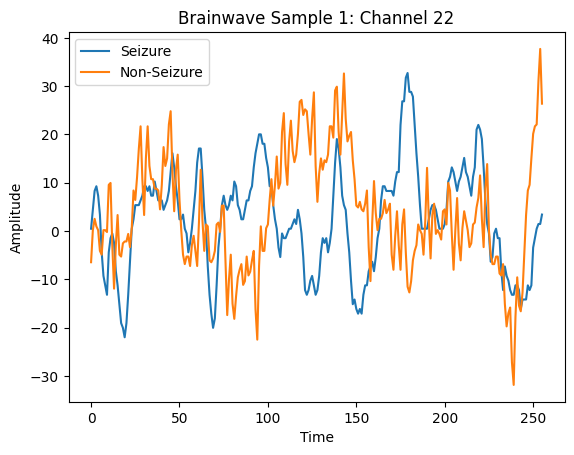

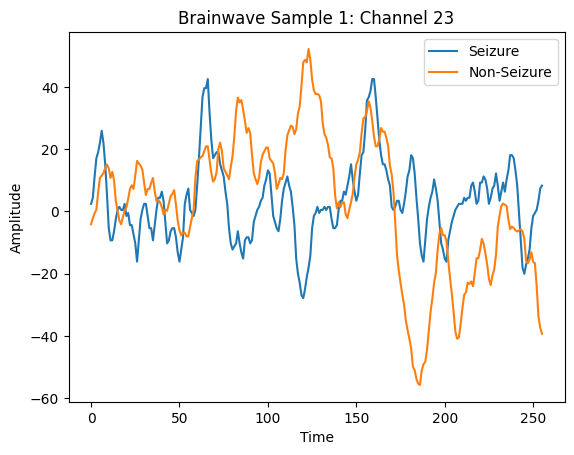

In [50]:
for i in range(23):
    plot_channel_diff(i, f'Channel {i+1}')